<a href="https://colab.research.google.com/github/EmAchieng/DataSciencePracticeSeries/blob/master/NeuralNetworks_Intro_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Live Coding - Implementing ANNs with Keras </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Propulsion Academy, 2020</center>



# Live Coding - Implementing ANNs with Keras


## Basic Regression Example

The following example is based on: [Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow](https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb)

Let's load TensorFlow and check which version we are using. It should be TensorFlow 2.x.x.

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf

In [3]:
# TensorFlow ≥2.0 is required
# assert tf.__version__ >= "2.0"
print(tf.__version__)

2.4.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import pydotplus
import graphviz
import keras

np.random.seed(42)  # for reproducibility
tf.random.set_seed(42)  # for reproducibility

### Load Data
Let's load a simple data set for a regression problem. We use the California housing dataset as a example since it can be obtained directly via scikit-learn.

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load Data
dataset = fetch_california_housing()
print(dataset.data.shape)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    dataset.data, dataset.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

(20640, 8)


### Scale Data

In [6]:
#First we have to scale the features. This is nothing new. Let's just use scikit-learn for it.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Define Model (Sequential API)
Define a simple feed forward neural network architecture model via the sequential keras api

#### When to use a Sequential model:
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#### A Sequential model is not appropriate when:
Your model has multiple inputs or multiple outputs
Any of your layers has multiple inputs or multiple outputs
You need to do layer sharing
You want non-linear topology (e.g. a residual connection, a multi-branch model)


In [7]:
# TODO: Add number of output neurons
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1),  # ?? How many output neurons do you need for regression # because we are doing a regression
    ]
)

In [8]:
#Its layers are accessible via the layers attribute:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


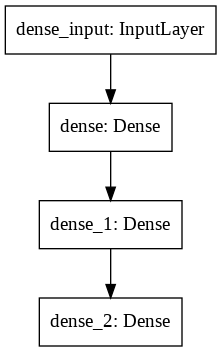

In [10]:
# draw a graph of the model (pydot, pydotplus and graphviz have to be installed)
tf.keras.utils.plot_model(model)

### Compile Model
After defining the model, we are now ready to compile the model. 

This will create a Python object which will build the network.

The compilation steps ask you to define the loss function and kind of optimizer you want to use. These options depend on the problem you are trying to solve

In [11]:
# compile the model using a simple SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=1e-3)

# TODO: Add loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=sgd_optimizer, 
    metrics=["mae", "mse"]
)

### Train Model
Now we need to train our model so that the parameters get tuned to provide the correct outputs for a given input. We do this by feeding inputs at the input layer and then getting an output, we then calculate the loss function using the output and use backpropagation to tune the model parameters. This will fit the model parameters to the data.


We calculate the mean square error on the test set.

In [12]:
# Train your model for 10 epochs
# You can increase the number of epochs to improve performance

# TODO: Add validation data set
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
history

Epoch 1/10
363/363 [==============================] - 4s 3ms/step - loss: 5.4430 - mae: 1.8438 - mse: 5.4430 - val_loss: 1.6920 - val_mae: 0.8694 - val_mse: 1.6920
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2171 - mae: 0.8147 - mse: 1.2171 - val_loss: 0.9683 - val_mae: 0.6941 - val_mse: 0.9683
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8172 - mae: 0.6872 - mse: 0.8172 - val_loss: 0.8211 - val_mae: 0.6267 - val_mse: 0.8211
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6958 - mae: 0.6258 - mse: 0.6958 - val_loss: 0.6152 - val_mae: 0.5953 - val_mse: 0.6152
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6379 - mae: 0.5978 - mse: 0.6379 - val_loss: 0.5678 - val_mae: 0.5623 - val_mse: 0.5678
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5904 - mae: 0.5696 - mse: 0.5904 - val_loss: 0.5354 - val_mae: 0.5467 - val_mse: 0.5354
Epoch 7/10
363/3

### Predict with Model

In [13]:
#predict on unseen X_test
model.predict(X_test)

array([[1.015488 ],
       [1.4783516],
       [3.0840306],
       ...,
       [1.2859194],
       [2.4041786],
       [3.6055217]], dtype=float32)

In [14]:
# Validation on the test data set
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("MSE of test set: {}".format(mse_test))

MSE of test set: [0.47324246168136597, 0.4965329170227051, 0.47324246168136597]


### Investigate Loss during training
Let's have a look at the evolution of the loss during the training. You might want too test what happens if you train for much more epochs.

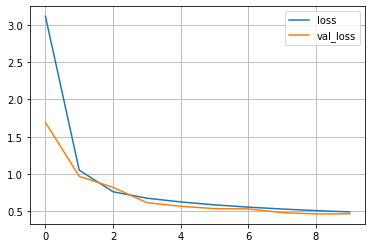

In [15]:

cols_to_plot = ["loss", "val_loss"]
plt.plot(pd.DataFrame(history.history)[cols_to_plot])
plt.legend(cols_to_plot, loc="upper right")
plt.grid(True)

In [16]:
#dataframe of two different loss functions
pd.DataFrame(history.history)[cols_to_plot]

,loss,val_loss
0,3.115577,1.692045
1,1.051065,0.968274
2,0.761859,0.821110
3,0.675758,0.615217
4,0.625831,0.567766
5,0.586245,0.535384
6,0.555788,0.531850
7,0.530768,0.482655
8,0.509024,0.464919
9,0.492024,0.465928


Predict a few data points of the test set to see whether the model works.

In [17]:
y_pred = model.predict(X_test[:3])
y_pred

array([[1.015488 ],
       [1.4783516],
       [3.0840306]], dtype=float32)

## Advanced Functionalities


### Functional API
#### When to use the Keras functional API 

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. 
The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

For these cases the functional API can be used.
The following example of a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)), which connects part of the inputs directly with the output layer, is based on: [Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow](https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb)

For a more advanced examples of using the functional API see this [TensorFlow Guide](https://www.tensorflow.org/guide/keras/functional).




In [18]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

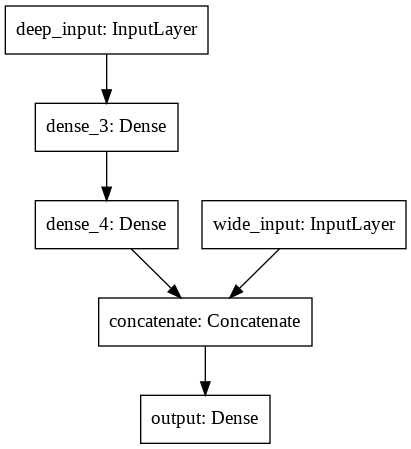

In [19]:
tf.keras.utils.plot_model(model)

In [20]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B),
    y_train,
    epochs=10,
    validation_data=((X_valid_A, X_valid_B), y_valid),
)
mse_test = model.evaluate((X_test_A, X_test_B), y_test, verbose=0)
print("MSE of test data set: {}".format(mse_test))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.9131 - val_loss: 0.8560
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8125 - val_loss: 0.6710
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6876 - val_loss: 0.6169
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6241 - val_loss: 0.5710
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5420
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5416 - val_loss: 0.5176
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - val_loss: 0.5065
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5136 - val_loss: 0.4790
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4917 - val_loss: 0.4564
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4781 - val_loss: 0.4451

### Custom Loss Functions

In [21]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

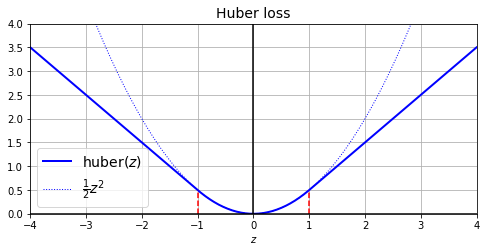

In [22]:

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [23]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [24]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])


In [25]:
model.fit(X_train, y_train, epochs=2,
          validation_data=(X_valid, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.9098 - mae: 1.3111 - val_loss: 0.2461 - val_mae: 0.5322
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2226 - mae: 0.5171 - val_loss: 0.2119 - val_mae: 0.4973


### Callbacks


In [26]:
model = keras.models.Sequential(
    [keras.layers.Dense(30, activation="relu", input_shape=[8]), keras.layers.Dense(1)]
)
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#### Define Callback Functions
First let's define some callback functions so that we can checkpoint our model and save it model parameters to file each time we get better results.

More info on available Keras Callbacks:
https://keras.io/api/callbacks/

More info on ModelCheckpoint class: 
https://keras.io/api/callbacks/model_checkpoint/


In [27]:
#
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_latest_nn_model.h5", save_best_only=True # save onky the weight and not the whole structure of the model
)

In [28]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb],
)
model = keras.models.load_model("my_latest_nn_model.h5")  # rollback to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.6779 - val_loss: 0.9873
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7445 - val_loss: 0.6552
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6593 - val_loss: 0.6199
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6153 - val_loss: 0.5724
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5689 - val_loss: 0.5425
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5412 - val_loss: 0.5197
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5399 - val_loss: 0.5139
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5117 - val_loss: 0.4828
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4964 - val_loss: 0.4691
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4829 - val_loss: 0.4584

### Store your Model

In [29]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(10, activation="relu", input_shape=[8]),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1),
    ]
)

In [30]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 3.8497 - val_loss: 3.9930
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 1.2303 - val_loss: 1.9253


Models created with the sequential or functional API can simple be saved and loaded:

In [31]:
model.save("my_nn_model.h5")
model = keras.models.load_model("my_nn_model.h5")

For some custom built models the save method does not work. In this case the weights can be saved. The model structure has to be saved separately.

In [32]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

## Advanced Example:
### Connect to Google Drive

In [33]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Advanced metrics

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

More info on keras metrics: https://keras.io/api/metrics/




In [34]:
from keras import metrics

In [35]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


model.compile(
  optimizer=keras.optimizers.Adam(lr=1e-3),
  loss=keras.losses.BinaryCrossentropy(),
  metrics=METRICS)


### Regularization and Dropout


In [36]:
model = keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu',
  input_shape=(X_train.shape[-1],)),
  tf.keras.layers.Dropout(0.5), #this is where we add dropout
  tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='zeros'),
])


### Early Stopping

In [37]:
model = keras.models.Sequential(
    [keras.layers.Dense(30, activation="relu", input_shape=[8]), keras.layers.Dense(1)]
)


In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=2e-3))



In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
early_stopping_cb

In [40]:

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

history.history

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.5983 - val_loss: 3.8393
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.9007 - val_loss: 0.7685
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6501 - val_loss: 0.5470
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5891 - val_loss: 0.5643
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5024
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4930 - val_loss: 0.4793
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4880 - val_loss: 0.4426
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4614 - val_loss: 0.4501
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4447 - val_loss: 0.4554
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4365 - val_loss: 0.4609

{'loss': [1.5733718872070312,
  0.7480759024620056,
  0.6221604347229004,
  0.557496964931488,
  0.5168893337249756,
  0.4833097755908966,
  0.46488702297210693,
  0.44971922039985657,
  0.43905651569366455,
  0.4319053590297699,
  0.4265204071998596,
  0.42190924286842346],
 'val_loss': [3.8393142223358154,
  0.7685132622718811,
  0.5470230579376221,
  0.5642936825752258,
  0.5024240016937256,
  0.4792707860469818,
  0.4425591826438904,
  0.45009645819664,
  0.4553939998149872,
  0.460936963558197,
  0.44522231817245483,
  0.4747394919395447]}

In [41]:
mse_test = model.evaluate(X_test, y_test, verbose=0)
mse_test

0.4501399099826813

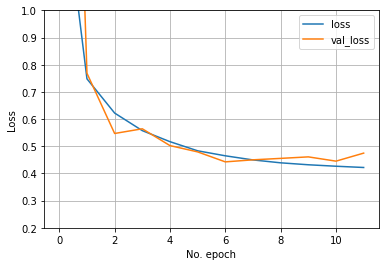

In [42]:
cols_to_plot = ["loss", "val_loss"]
plt.plot(pd.DataFrame(history.history)[cols_to_plot])
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(cols_to_plot, loc="upper right")
plt.ylim([0.2, 1])
plt.grid(True)

### Weight Initialization

Initializers define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers depends on the layer. Usually, it is simply kernel_initializer and bias_initializer

More Initializers:
https://keras.io/api/layers/initializers/





In [43]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()
)


In [44]:
#All built-in initializers can also be passed via their string identifier:

layer = layers.Dense(
    units=64,
    kernel_initializer='random_normal',
    bias_initializer='zeros'
)

In [45]:
# This initializer generates tensors with a normal distribution.

tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)



### Training History



In [46]:
# history object

# When running this model, Keras maintains a so-called History object in the background. 
# The history object is the output of the fit operation so it can be accessed in your Python script by slightly adapting that row in the above code to:

# The History.history attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

history.history

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4497 - val_loss: 0.4473
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4400 - val_loss: 0.4879
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4327 - val_loss: 0.4755
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.4808
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.4408
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4177 - val_loss: 0.4878
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4155 - val_loss: 0.4633
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - val_loss: 0.4287
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4099 - val_loss: 0.4446
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4078 - val_lo

{'loss': [0.44974395632743835,
  0.439953088760376,
  0.4326845705509186,
  0.42598757147789,
  0.4225969612598419,
  0.4176982045173645,
  0.41545745730400085,
  0.4126279652118683,
  0.4099140167236328,
  0.40775975584983826,
  0.40635842084884644,
  0.4041284918785095,
  0.40269964933395386,
  0.40126410126686096,
  0.39938193559646606,
  0.3980250954627991,
  0.396749883890152,
  0.395911306142807,
  0.394142210483551,
  0.3933323621749878,
  0.3922629952430725],
 'val_loss': [0.4472765028476715,
  0.48786407709121704,
  0.47551429271698,
  0.4808345139026642,
  0.4407772421836853,
  0.48784786462783813,
  0.46325674653053284,
  0.428737610578537,
  0.44463175535202026,
  0.4757206439971924,
  0.4154207110404968,
  0.4788682162761688,
  0.45801544189453125,
  0.41790294647216797,
  0.43063926696777344,
  0.41121402382850647,
  0.4566758871078491,
  0.44557011127471924,
  0.41987866163253784,
  0.47881758213043213,
  0.44092342257499695]}

### Class Weights

In [47]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

In [48]:
class_weight = dict(enumerate(class_weight))


In [49]:
#
model.fit(X_train, 
          y_train, 
          epochs=5, 
          batch_size=32, 
          class_weight=class_weight)


Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3132
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3021
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3572
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2900
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2938
